In [1]:
import pandas as pd
import os

%run "util/funciones.ipynb"

In [2]:
df = pd.read_csv("data/raw/estat_lfsq_pganws_en.csv")

In [3]:
df.head()

,DATAFLOW,LAST UPDATE,freq,unit,sex,citizen,age,wstatus,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:LFSQ_PGANWS(1.0),15/03/24 11:00:00,Q,THS_PER,F,EU27_2020_FOR,Y15-19,ACT,AT,1998-Q1,NaN,u
1,ESTAT:LFSQ_PGANWS(1.0),15/03/24 11:00:00,Q,THS_PER,F,EU27_2020_FOR,Y15-19,ACT,AT,1999-Q1,NaN,u
2,ESTAT:LFSQ_PGANWS(1.0),15/03/24 11:00:00,Q,THS_PER,F,EU27_2020_FOR,Y15-19,ACT,AT,2000-Q1,NaN,u
3,ESTAT:LFSQ_PGANWS(1.0),15/03/24 11:00:00,Q,THS_PER,F,EU27_2020_FOR,Y15-19,ACT,AT,2000-Q2,NaN,u
4,ESTAT:LFSQ_PGANWS(1.0),15/03/24 11:00:00,Q,THS_PER,F,EU27_2020_FOR,Y15-19,ACT,AT,2001-Q1,NaN,u


eliminamos columans inutiles

In [4]:
df = df.drop(['DATAFLOW','freq','unit','OBS_FLAG','LAST UPDATE'],axis=1)

cambiar Nan por ceros en OBS_VALUE

In [5]:
df['OBS_VALUE'] = df['OBS_VALUE'].fillna(0)


In [25]:
df['citizen'].unique()

array(['EU27_2020_FOR', 'FOR', 'NAT', 'NEU27_2020_FOR', 'NRP', 'STLS',
       'TOTAL'], dtype=object)

In [26]:
df['age'].unique()

array(['Y15-19', 'Y15-24', 'Y15-39', 'Y15-59', 'Y15-64', 'Y15-74',
       'Y20-24', 'Y20-64', 'Y25-29', 'Y25-49', 'Y25-54', 'Y25-59',
       'Y25-64', 'Y30-34', 'Y35-39', 'Y40-44', 'Y40-59', 'Y40-64',
       'Y45-49', 'Y50-54', 'Y50-59', 'Y50-64', 'Y55-59', 'Y55-64',
       'Y60-64', 'Y65-69', 'Y70-74', 'Y_GE15', 'Y_GE25', 'Y_GE50',
       'Y_GE65', 'Y_GE75'], dtype=object)

añdimos columnas con fechas año mes y dia

In [6]:
# Función para mapear los trimestres a meses específicos
def map_quarter_to_month(quarter):
    year, q = quarter.split('-Q')
    if q == '1':
        return f"{year}-01-01"
    elif q == '2':
        return f"{year}-04-01"
    elif q == '3':
        return f"{year}-07-01"
    elif q == '4':
        return f"{year}-10-01"
    else:
        return None

# Crear la nueva columna 'year_month' basada en la columna 'TIME_PERIOD'
df['year_month'] = df['TIME_PERIOD'].apply(map_quarter_to_month)

nos quedamos con los extranjeros activos

In [7]:
df_foreigners_act = df[(df['citizen']=='FOR') & (df['wstatus']=='ACT')]
df_foreigners_act.head(10)

,sex,citizen,age,wstatus,geo,TIME_PERIOD,OBS_VALUE,year_month
378374,F,FOR,Y15-19,ACT,AT,1998-Q1,9.5,1998-01-01
378375,F,FOR,Y15-19,ACT,AT,1999-Q1,7.3,1999-01-01
378376,F,FOR,Y15-19,ACT,AT,2000-Q1,9.7,2000-01-01
378377,F,FOR,Y15-19,ACT,AT,2000-Q2,8.8,2000-04-01
378378,F,FOR,Y15-19,ACT,AT,2001-Q1,7.7,2001-01-01
378379,F,FOR,Y15-19,ACT,AT,2002-Q1,7.6,2002-01-01
378380,F,FOR,Y15-19,ACT,AT,2003-Q1,6.5,2003-01-01
378381,F,FOR,Y15-19,ACT,AT,2003-Q2,4.6,2003-04-01
378382,F,FOR,Y15-19,ACT,AT,2003-Q3,5.6,2003-07-01
378383,F,FOR,Y15-19,ACT,AT,2003-Q4,6.2,2003-10-01


y con la fecha >= 2014

In [8]:
df_foreigners_act = df_foreigners_act[df_foreigners_act['year_month'] >= '2014-01-01']

In [30]:
df_foreigners_act.head(10)

,sex,citizen,age,wstatus,geo,TIME_PERIOD,OBS_VALUE,year_month
378424,F,FOR,Y15-19,ACT,AT,2014-Q1,7.4,2014-01-01
378425,F,FOR,Y15-19,ACT,AT,2014-Q2,6.5,2014-04-01
378426,F,FOR,Y15-19,ACT,AT,2014-Q3,6.1,2014-07-01
378427,F,FOR,Y15-19,ACT,AT,2014-Q4,7.2,2014-10-01
378428,F,FOR,Y15-19,ACT,AT,2015-Q1,5.3,2015-01-01
378429,F,FOR,Y15-19,ACT,AT,2015-Q2,5.4,2015-04-01
378430,F,FOR,Y15-19,ACT,AT,2015-Q3,6.9,2015-07-01
378431,F,FOR,Y15-19,ACT,AT,2015-Q4,7.1,2015-10-01
378432,F,FOR,Y15-19,ACT,AT,2016-Q1,7.5,2016-01-01
378433,F,FOR,Y15-19,ACT,AT,2016-Q2,10.0,2016-04-01


UK lo quitamos de los paises?

In [9]:
countries = ['AT', 'BE', 'CH', 'CY', 'CZ', 'DE', 'DK', 'EE', 'EL', 'ES',
       'FI', 'FR', 'HR', 'HU', 'IE', 'IS', 'IT', 'LU', 'ME',
       'MT', 'NL', 'NO', 'PL', 'PT', 'RS', 'SE', 'SI', 'SK', 'UK', 'BA',
       'BG', 'LT', 'LV', 'MK', 'RO', 'TR']

creamos df por pais

In [10]:
# Crear un diccionario de DataFrames, uno por cada país
dfs_by_country = {}
for country in countries:
    dfs_by_country[country] = [df_foreigners_act[(df_foreigners_act['geo'] == country) & (df_foreigners_act['sex'] == 'M')],
                               df_foreigners_act[(df_foreigners_act['geo'] == country) & (df_foreigners_act['sex'] == 'F')]]

paises con df vacio

In [11]:
# Crear una lista para almacenar los países con DataFrames vacíos
paises_con_dfs_vacios = []

# Iterar sobre el diccionario
for country, dfs in dfs_by_country.items():
    # Verificar si ambas listas están vacías
    if len(dfs[0]) == 0 and len(dfs[1]) == 0:
        paises_con_dfs_vacios.append(country)

# Imprimir los países con DataFrames vacíos
print("Países con DataFrames vacíos:")
for pais in paises_con_dfs_vacios:
    print(pais)

Países con DataFrames vacíos:
TR


lo eliminamos

In [12]:
del dfs_by_country['TR']

recorremos el diccionario y añadimos una columna con el total de obs para cada fecha en cada dataframe

In [13]:
# Iterar sobre el diccionario
for country, dfs in dfs_by_country.items():
    # Iterar sobre los DataFrames para el país actual
    for df_gender in dfs:
        # Calcular el total de observaciones por fecha
        df_gender['total_obs_value'] = df_gender.groupby('year_month')['OBS_VALUE'].transform('sum')
        

        

C:\Users\ricar\AppData\Local\Temp\ipykernel_42396\2951123173.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gender['total_obs_value'] = df_gender.groupby('year_month')['OBS_VALUE'].transform('sum')
C:\Users\ricar\AppData\Local\Temp\ipykernel_42396\2951123173.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gender['total_obs_value'] = df_gender.groupby('year_month')['OBS_VALUE'].transform('sum')
C:\Users\ricar\AppData\Local\Temp\ipykernel_42396\2951123173.py:6: SettingWithCopyWarning: 
A value 

salvamos los dfs en csv
AHORA VIENEN SEPARADOS POR SEXO.

In [14]:
if not os.path.exists("data/pre-processed"):
    os.makedirs("data/pre-processed")

# Iterar sobre las claves y valores del diccionario
for pais, dfs_pais in dfs_by_country.items():
    i = 0
    for df in dfs_pais:
        # Generar el nombre del archivo CSV
        if (i == 0):
            nombre_archivo = f"data/pre-processed/foreigner_act_{pais}_M.csv"
            i = 1
        else:
            
            nombre_archivo = f"data/pre-processed/foreigner_act_{pais}_F.csv"
        # Guardar el DataFrame como un archivo CSV
        df.to_csv(nombre_archivo, index=False)


guardamos las series

In [15]:
if not os.path.exists("data/processed"):
    os.makedirs("data/processed")

# Iterar sobre las claves y valores del diccionario
for pais, dfs_pais in dfs_by_country.items():
    i = 0
    for df in dfs_pais:
        # Generar el nombre del archivo CSV
        df = df.iloc[:40,7:]
        if (i == 0):
            nombre_archivo = f"data/processed/serie_act_{pais}_M.csv"
            i = 1
        else:
            
            nombre_archivo = f"data/processed/serie_act_{pais}_F.csv"
        # Guardar el DataFrame como un archivo CSV
        df.to_csv(nombre_archivo, index=False)


completa la serie temporal,y la sobreescribe

In [16]:

# Llamar a la función con la ruta de la carpeta 'data/processed'
completar_serie_temporal_mensual('data/processed')

ABRIR Y PINTAR UNA SERIE

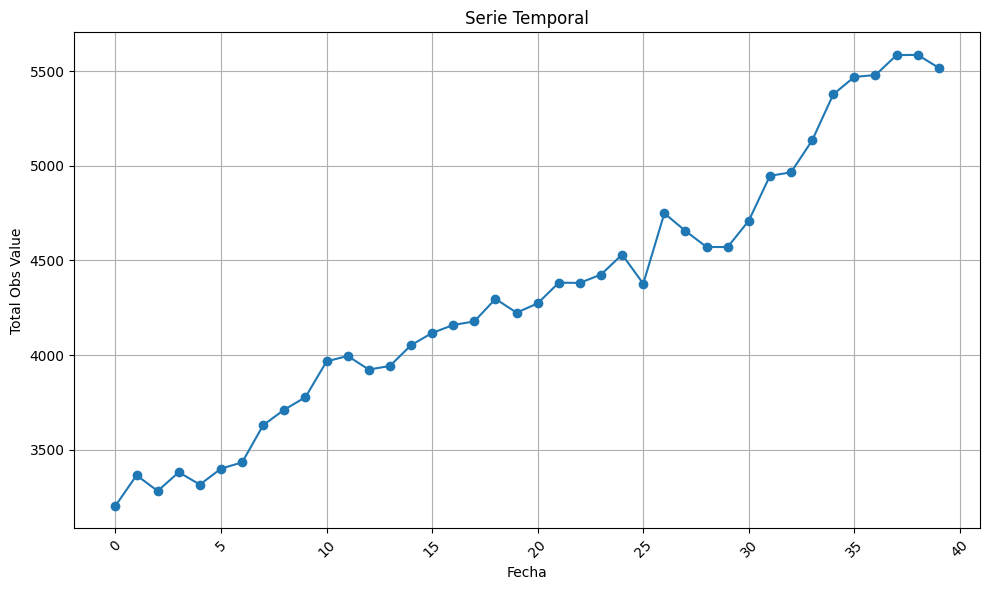

In [38]:
import matplotlib.pyplot as plt

# Leer el archivo CSV
df = pd.read_csv('data/processed/serie_act_AT_F.csv')

# Convertir la columna 'year_month' a tipo datetime si es necesario
#df['year_month'] = pd.to_datetime(df['year_month'])

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Trazar la serie temporal
plt.plot(df['total_obs_value'], marker='o', linestyle='-')

# Configurar etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Total Obs Value')
plt.title('Serie Temporal')

# Rotar las etiquetas del eje x para mejor visualización
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.grid(True)
plt.tight_layout()